In [ ]:
# MP_work_notebook

In [7]:
from alpaca.data.historical import CryptoHistoricalDataClient

# No keys required for crypto data
client = CryptoHistoricalDataClient()

In [8]:
import alpaca_trade_api as tradeapi
import pandas as pd
import pandas_ta as ta
# import mplfinance as mpf
import matplotlib.pyplot as plt

#Loading Alpaca API keys
API_Key = "PK688IQ8GKXYNUE4M7YX"
API_secret_key = "LKfuASkhgHQm6xnD6em7CHrZbPoB8Nt7Pabo0jPZ"
API_base_url = "https://paper-api.alpaca.markets"
api = tradeapi.REST(API_Key, API_secret_key, API_base_url, api_version='v2')

In [9]:
from alpaca.data.requests import CryptoBarsRequest
from alpaca.data.timeframe import TimeFrame

# user input for the ticker and date range
crypto_input = input("Enter the cryptocurrency symbols (e.g., BTC, ETH, DOGE, LTC): ")
crypto_list = [f"{ticker.strip()}/USD" for ticker in crypto_input.split(",")]  # Format as f-string

start_year = input("Enter the start year (YYYY): ")
start_month = input("Enter the start month (MM): ")
start_day = input("Enter the start day (DD): ")

end_year = input("Enter the end year (YYYY): ")
end_month = input("Enter the end month (MM): ")
end_day = input("Enter the end day (DD): ")

# Construct start and end date strings
start_date = f"{start_year}-{start_month}-{start_day}"
end_date = f"{end_year}-{end_month}-{end_day}"

# Creating request object
request_params = CryptoBarsRequest(
    symbol_or_symbols=crypto_list,  # Use the formatted list of tickers
    timeframe=TimeFrame.Day,
    start=start_date,
    end=end_date
)


Enter the cryptocurrency symbols (e.g., BTC, ETH, DOGE, LTC):  BTC, ETH, DOGE, LTC
Enter the start year (YYYY):  2023
Enter the start month (MM):  06
Enter the start day (DD):  06
Enter the end year (YYYY):  2024
Enter the end month (MM):  06
Enter the end day (DD):  06


In [10]:
request_params

{   'currency': None,
    'end': datetime.datetime(2024, 6, 6, 0, 0),
    'limit': None,
    'sort': None,
    'start': datetime.datetime(2023, 6, 6, 0, 0),
    'symbol_or_symbols': ['BTC/USD', 'ETH/USD', 'DOGE/USD', 'LTC/USD'],
    'timeframe': <alpaca.data.timeframe.TimeFrame object at 0x0000027B53E1B460>}

In [11]:
# Retrieve daily bars for Bitcoin in a DataFrame and printing it
crypto_bars = client.get_crypto_bars(request_params)
# Convert to dataframe
crypto_df = crypto_bars.df.reset_index()

#Format and clean datafame
crypto_df.loc[:,'date'] = pd.to_datetime(crypto_df.loc[:,'timestamp']).dt.date
clean_crypto_df = crypto_df.copy()[['symbol', 'date', 'open', 'close', 'volume']]
clean_crypto_df

,symbol,date,open,close,volume
0,BTC/USD,2023-06-06,25860.36000,27320.61970,3977.885163
1,BTC/USD,2023-06-07,27335.09000,26408.45000,2084.926578
2,BTC/USD,2023-06-08,26718.38000,26499.11841,843.487726
3,BTC/USD,2023-06-09,26519.89000,25773.42720,1074.256367
4,BTC/USD,2023-06-10,25802.00000,25745.59268,915.360571
...,...,...,...,...,...
1459,LTC/USD,2024-06-01,83.22920,83.37400,3.430038
1460,LTC/USD,2024-06-02,83.37800,83.40500,0.023050
1461,LTC/USD,2024-06-03,83.60250,82.03960,5.678387
1462,LTC/USD,2024-06-04,81.82615,83.96500,2.430547


In [12]:
# Get unique symbols from the DataFrame
unique_symbols = clean_crypto_df['symbol'].unique()

# Create a dictionary to hold separate DataFrames for each unique symbol
clean_crypto_dfs = {}

# Loop through each unique symbol and create a DataFrame for it
for symbol in unique_symbols:
    # Create a valid variable name
    variable_name = symbol.replace('/', '_')  # Replace '/' with '_' to create a valid variable name
    globals()[f"{variable_name}_df"] = clean_crypto_df[crypto_df['symbol'] == symbol].reset_index(drop=True)

    # print(f"\nDataFrame for {variable_name}:\n", globals()[f"{variable_name}_df"])
        
# Now you can access the DataFrames with variable names
# print(BTC_USD_df)  # DataFrame for Bitcoin
# print(ETH_USD_df)  # DataFrame for Ethereum, if it exists

In [13]:
# Create ???_df_calc for each df
for symbol in unique_symbols:
    variable_name = symbol.replace('/', '_')  # Replace '/' with '_' to create a valid variable name
    crypto_df_calc = globals()[f"{variable_name}_df"]
    locals()[f"crypto_df_{variable_name}"] = crypto_df_calc
    
    print(f"\nDataFrame for {variable_name}:\n", locals()[f"crypto_df_{variable_name}"])


DataFrame for BTC_USD:
       symbol        date       open        close       volume
0    BTC/USD  2023-06-06  25860.360  27320.61970  3977.885163
1    BTC/USD  2023-06-07  27335.090  26408.45000  2084.926578
2    BTC/USD  2023-06-08  26718.380  26499.11841   843.487726
3    BTC/USD  2023-06-09  26519.890  25773.42720  1074.256367
4    BTC/USD  2023-06-10  25802.000  25745.59268   915.360571
..       ...         ...        ...          ...          ...
361  BTC/USD  2024-06-01  67647.500  67805.43650     0.521611
362  BTC/USD  2024-06-02  67770.385  68489.36500     0.509500
363  BTC/USD  2024-06-03  68509.751  69047.93550     2.824954
364  BTC/USD  2024-06-04  69006.095  71226.09100     6.400314
365  BTC/USD  2024-06-05  71146.950  71101.43800     1.957128

[366 rows x 5 columns]

DataFrame for DOGE_USD:
        symbol        date      open     close        volume
0    DOGE/USD  2023-06-06  0.066908  0.070721  2.010152e+07
1    DOGE/USD  2023-06-07  0.070712  0.067816  1.306578e+07
2

In [14]:
# Create ???_df_calc for each df
for symbol in unique_symbols:
    variable_name = symbol.replace('/', '_')  # Replace '/' with '_' to create a valid variable name
    crypto_df_calc = globals()[f"{variable_name}_df"]

    #Run calculations
    crypto_first_open = crypto_df_calc['open'].iloc[0]
    price_change = ((crypto_df_calc.loc[:,'close'] - crypto_first_open) / crypto_first_open) * 100
    daily_change = ((crypto_df_calc.loc[:,'close'] - crypto_df_calc.loc[:,'open']) / crypto_df_calc.loc[:,'open']) * 100
    average_volume_crypto = crypto_df_calc['volume'].mean()

    crypto_df_calc.loc[:, 'price change %'] = ((crypto_df_calc.loc[:,'close'] - crypto_first_open) / crypto_first_open) * 100
    crypto_df_calc.loc[:, 'daily change %'] = ((crypto_df_calc.loc[:,'close'] - crypto_df_calc.loc[:,'open']) 
                                                 / crypto_df_calc.loc[:,'open']) * 100
    crypto_df_calc.loc[:, 'vol_vs_average %'] = ((crypto_df_calc.loc[:,'volume'] - average_volume_crypto) / average_volume_crypto) * 100
    
    locals()[f"crypto_df_{variable_name}"] = crypto_df_calc
    
    print(f"\nDataFrame for {variable_name}:\n", locals()[f"crypto_df_{variable_name}"])


DataFrame for BTC_USD:
       symbol        date       open        close       volume  price change %  \
0    BTC/USD  2023-06-06  25860.360  27320.61970  3977.885163        5.646711   
1    BTC/USD  2023-06-07  27335.090  26408.45000  2084.926578        2.119421   
2    BTC/USD  2023-06-08  26718.380  26499.11841   843.487726        2.470029   
3    BTC/USD  2023-06-09  26519.890  25773.42720  1074.256367       -0.336162   
4    BTC/USD  2023-06-10  25802.000  25745.59268   915.360571       -0.443796   
..       ...         ...        ...          ...          ...             ...   
361  BTC/USD  2024-06-01  67647.500  67805.43650     0.521611      162.198347   
362  BTC/USD  2024-06-02  67770.385  68489.36500     0.509500      164.843045   
363  BTC/USD  2024-06-03  68509.751  69047.93550     2.824954      167.002994   
364  BTC/USD  2024-06-04  69006.095  71226.09100     6.400314      175.425752   
365  BTC/USD  2024-06-05  71146.950  71101.43800     1.957128      174.943729   

  

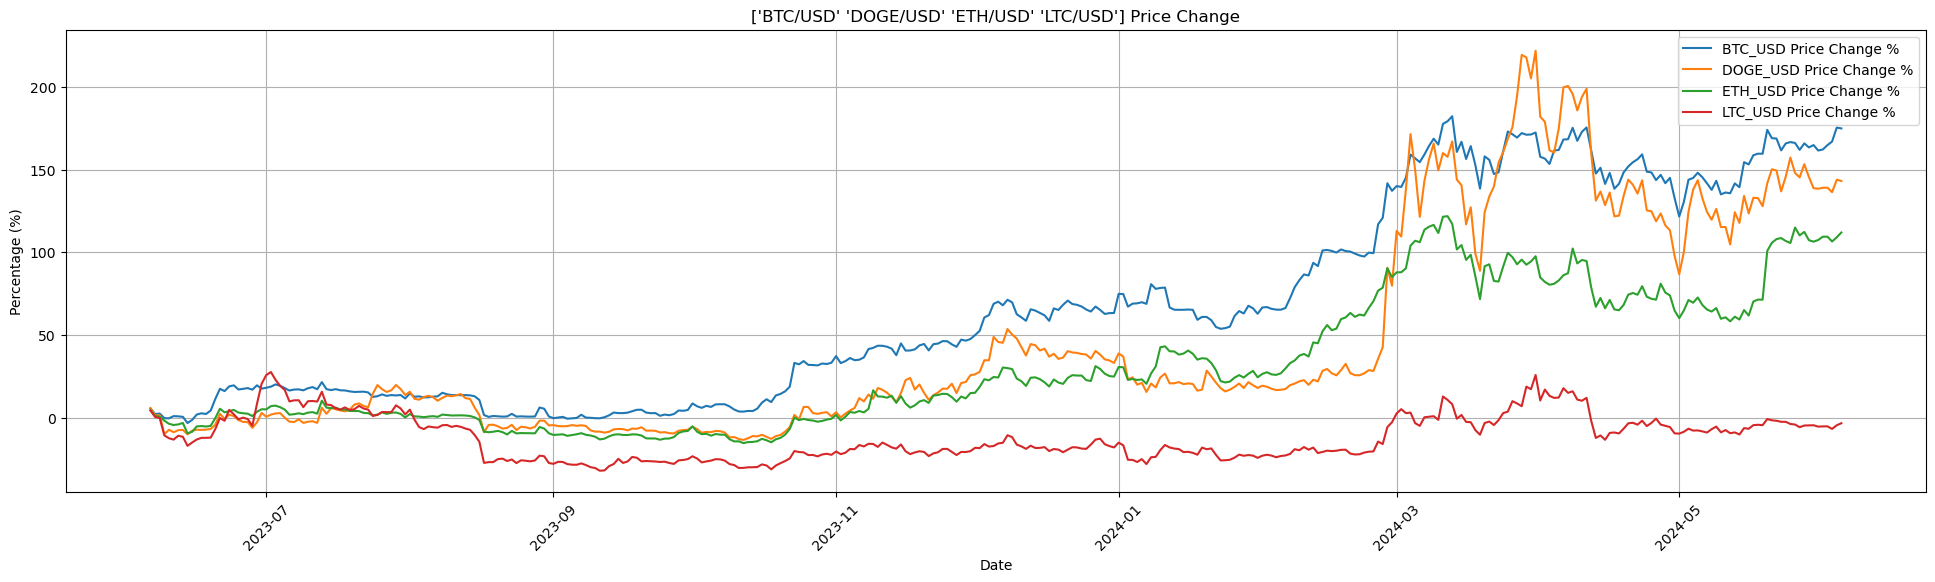

In [15]:
# Create a figure and axis for plotting
plt.figure(figsize=(24, 6))

for symbol in unique_symbols:
    variable_name = symbol.replace('/', '_')  # Replace '/' with '_' to create a valid variable name

    plt.plot(locals()[f"crypto_df_{variable_name}"]['date'], 
             locals()[f"crypto_df_{variable_name}"]['price change %'], 
             label=f'{variable_name} Price Change %')
   
# Adding titles and labels
plt.title(f'{unique_symbols} Price Change')
plt.xlabel('Date')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()  # Show legend
plt.grid()  # Show grid

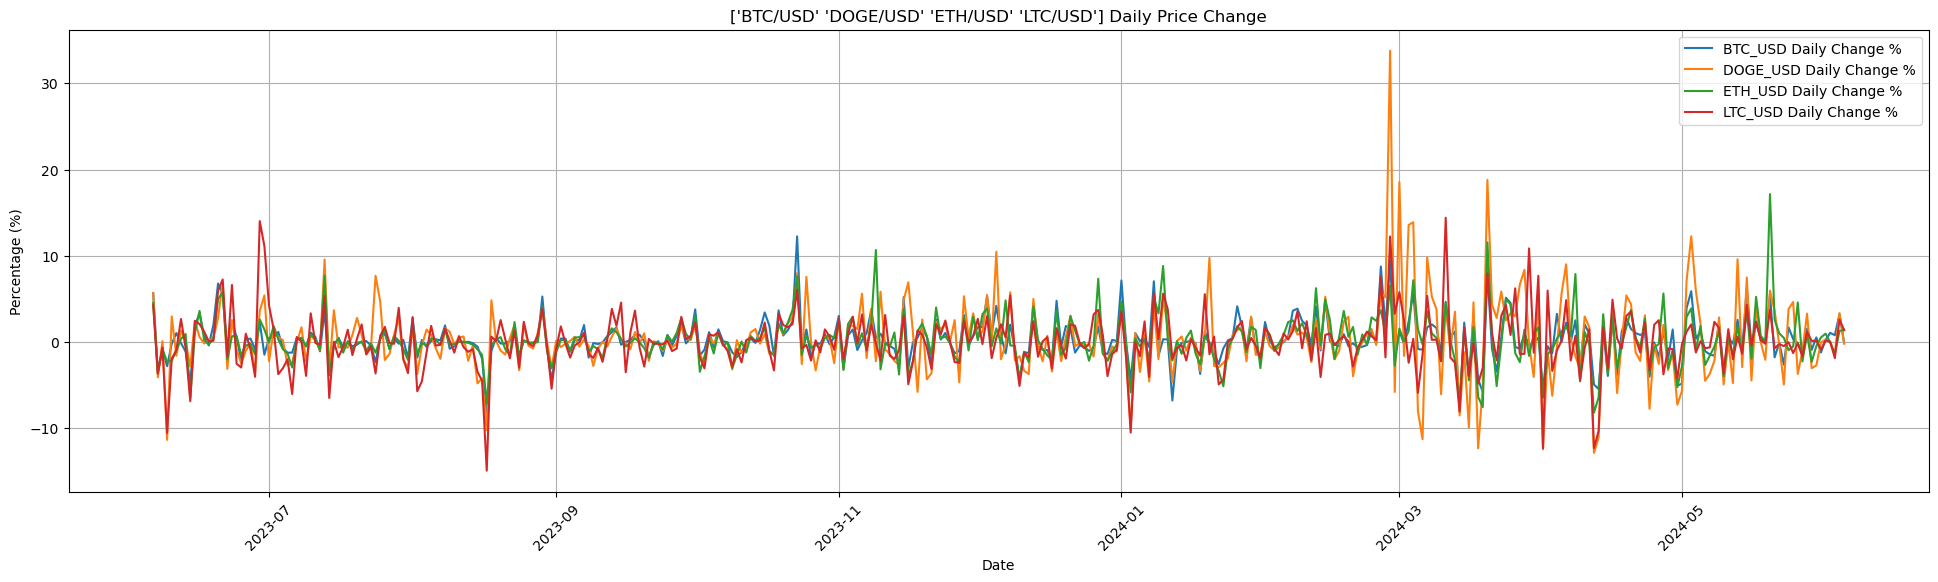

In [16]:
# Create a figure and axis for plotting
plt.figure(figsize=(24, 6))

for symbol in unique_symbols:
    variable_name = symbol.replace('/', '_')  # Replace '/' with '_' to create a valid variable name

    plt.plot(locals()[f"crypto_df_{variable_name}"]['date'], 
             locals()[f"crypto_df_{variable_name}"]['daily change %'], 
             label=f'{variable_name} Daily Change %')
   
# Adding titles and labels
plt.title(f'{unique_symbols} Daily Price Change')
plt.xlabel('Date')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()  # Show legend
plt.grid()  # Show grid

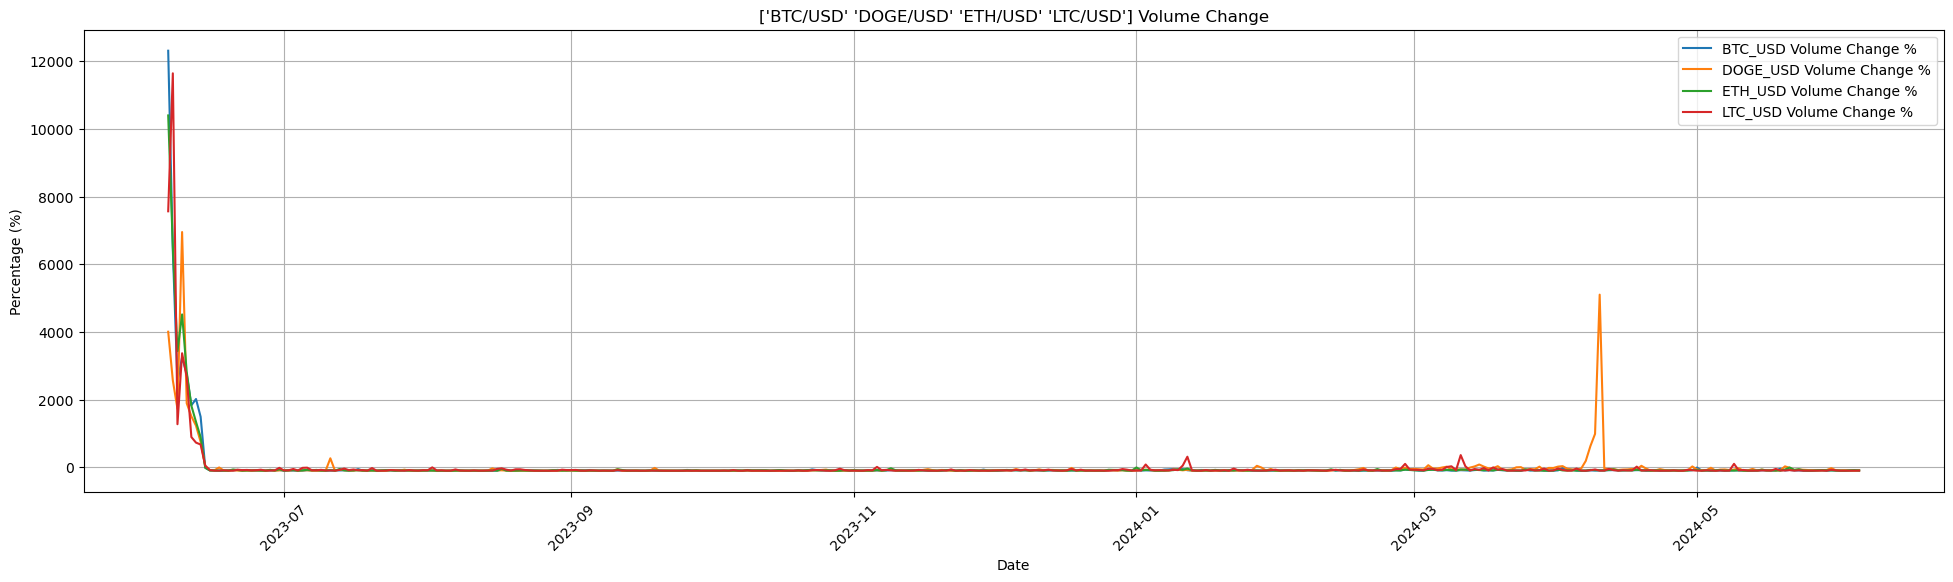

In [17]:
# Create a figure and axis for plotting
plt.figure(figsize=(24, 6))

for symbol in unique_symbols:
    variable_name = symbol.replace('/', '_')  # Replace '/' with '_' to create a valid variable name

    plt.plot(locals()[f"crypto_df_{variable_name}"]['date'], 
             locals()[f"crypto_df_{variable_name}"]['vol_vs_average %'], 
             label=f'{variable_name} Volume Change %')
   
# Adding titles and labels
plt.title(f'{unique_symbols} Volume Change')
plt.xlabel('Date')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()  # Show legend
plt.grid()  # Show grid

In [20]:
# user input for the ticker 
ticker_input = input("Enter the Stock symbols (e.g., NVDA, AMD, TSM, INTC): ")
ticker_list = [f"{ticker.strip()}" for ticker in ticker_input.split(",")]  # Format as f-string
print(ticker_list)

Enter the Stock symbols (e.g., NVDA, AMD, TSM, INTC):  NVDA, AMD, TSM, INTC


['NVDA', 'AMD', 'TSM', 'INTC']


In [21]:
def fetch_data(ticker_list, start_date, end_date, timeframe='1D'):
    all_data = []  # To hold DataFrames for all symbols
    
    for symbol in ticker_list:
        # Fetching bar data from Alpaca
        barset = api.get_bars(symbol, timeframe, start=start_date, end=end_date)
        
        # Convert the barset to a DataFrame
        bars_df = pd.DataFrame([{
            'ticker': symbol,
            'time': bar.t.strftime('%Y-%m-%d %H:%M:%S'),  # Converting timestamp to string
            'open': bar.o,
            'high': bar.h,
            'low': bar.l,
            'close': bar.c,
            'volume': bar.v
        } for bar in barset])

        # Append this symbol's DataFrame to the list
        all_data.append(bars_df)

    # Concatenate all individual DataFrames into one
    combined_df = pd.concat(all_data, ignore_index=True)

    return combined_df

# List of tickers
print(ticker_list) 

# Fetching data and returning as a DataFrame
stock_df = fetch_data(ticker_list, start_date, end_date)

# Dynamically create DataFrames for each symbol
for symbol in ticker_list:
    variable_name = symbol.replace('/', '_')  # Replace '/' with '_' to create a valid variable name
    stock_df.loc[:,'date'] = pd.to_datetime(stock_df.loc[:,'time']).dt.date
    clean_stock_df = stock_df.copy()[['ticker', 'date', 'open', 'close', 'volume']]
    globals()[f"{variable_name}_df"] = clean_stock_df[clean_stock_df['ticker'] == symbol]
    print(f"\nDataFrame for {symbol}:\n", globals()[f"{variable_name}_df"])

['NVDA', 'AMD', 'TSM', 'INTC']

DataFrame for NVDA:
     ticker        date     open    close    volume
0     NVDA  2023-06-06   388.30   386.54  38872217
1     NVDA  2023-06-07   389.15   374.75  51229255
2     NVDA  2023-06-08   377.24   385.10  41785641
3     NVDA  2023-06-09   390.37   387.70  42855407
4     NVDA  2023-06-12   392.00   394.82  38970455
..     ...         ...      ...      ...       ...
248   NVDA  2024-05-31  1125.20  1096.33  61326250
249   NVDA  2024-06-03  1136.21  1150.00  43839176
250   NVDA  2024-06-04  1157.16  1164.37  40332401
251   NVDA  2024-06-05  1183.71  1224.40  52840178
252   NVDA  2024-06-06  1240.48  1209.98  66469619

[253 rows x 5 columns]

DataFrame for AMD:
     ticker        date     open   close    volume
253    AMD  2023-06-06  117.910  124.23  75266021
254    AMD  2023-06-07  124.025  117.83  83887743
255    AMD  2023-06-08  118.295  121.05  65249825
256    AMD  2023-06-09  123.570  124.92  75084336
257    AMD  2023-06-12  128.520  129.19 

In [22]:
for symbol in ticker_list:
    variable_name = symbol.replace('/', '_')  # Replace '/' with '_' to create a valid variable name
    stock_df_calc = globals()[f"{variable_name}_df"].copy()  # Make sure to use .copy() to avoid SettingWithCopyWarning
              
    # Apply 1:10 split adjustment for NVDA before 2024-06-10
    if variable_name == 'NVDA':
        stock_df_calc['date'] = pd.to_datetime(stock_df_calc['date'])
        stock_df_calc.loc[stock_df_calc['date'] < pd.Timestamp('2024-06-10'), ['open', 'close']] /= 10
        stock_df_calc.loc[stock_df_calc['date'] < pd.Timestamp('2024-06-10'), ['volume']] *= 10
    
    # Run calculations
    stock_first_open = stock_df_calc.loc[:,'open'].iloc[0]
    stock_close = stock_df_calc.loc[:,'close']
    stock_open = stock_df_calc.loc[:,'open']
    price_change = ((stock_close - stock_first_open) / stock_first_open) * 100
    daily_change = ((stock_close - stock_open) / stock_open) * 100
    average_volume_stock = stock_df_calc['volume'].mean()
    volume = stock_df_calc.loc[:,'volume']
    volume_change = ((volume - average_volume_stock) / average_volume_stock) * 100

    # Use .loc[] to assign the new calculated columns
    stock_df_calc.loc[:,'price change %'] = price_change
    stock_df_calc.loc[:,'daily change %'] =  daily_change
    stock_df_calc.loc[:,'vol_vs_average %'] = volume_change
    
    # Store the DataFrame with the new name
    locals()[f"stock_df_{variable_name}"] = stock_df_calc
    
    # Print out the DataFrame
    print(f"\nDataFrame for {variable_name}:\n", locals()[f"stock_df_{variable_name}"])


DataFrame for NVDA:
     ticker       date     open    close     volume  price change %  \
0     NVDA 2023-06-06   38.830   38.654  388722170       -0.453258   
1     NVDA 2023-06-07   38.915   37.475  512292550       -3.489570   
2     NVDA 2023-06-08   37.724   38.510  417856410       -0.824105   
3     NVDA 2023-06-09   39.037   38.770  428554070       -0.154520   
4     NVDA 2023-06-12   39.200   39.482  389704550        1.679114   
..     ...        ...      ...      ...        ...             ...   
248   NVDA 2024-05-31  112.520  109.633  613262500      182.340973   
249   NVDA 2024-06-03  113.621  115.000  438391760      196.162761   
250   NVDA 2024-06-04  115.716  116.437  403324010      199.863508   
251   NVDA 2024-06-05  118.371  122.440  528401780      215.323204   
252   NVDA 2024-06-06  124.048  120.998  664696190      211.609580   

     daily change %  vol_vs_average %  
0         -0.453258        -18.975899  
1         -3.700373          6.780746  
2          2.0835

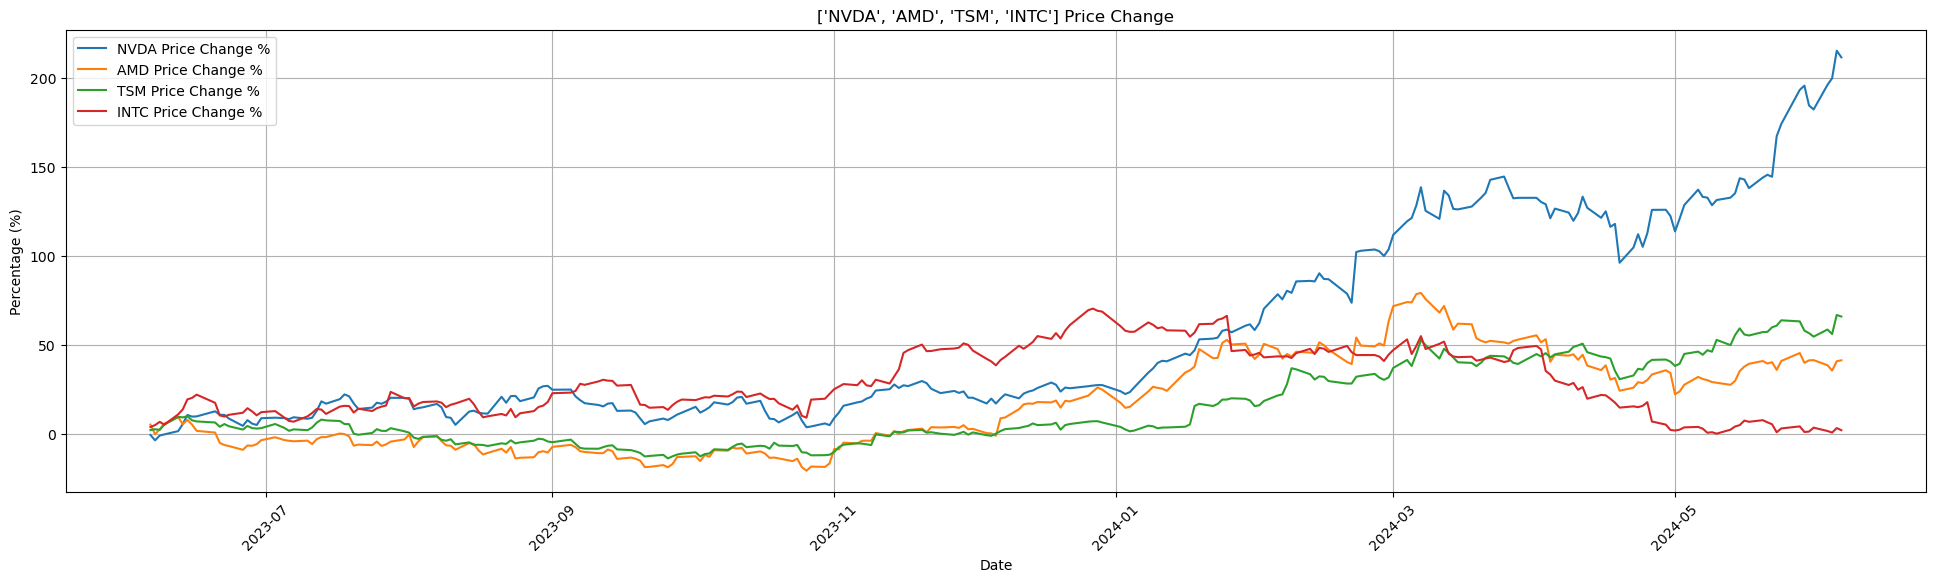

In [23]:
# Create a figure and axis for plotting
plt.figure(figsize=(24, 6))

for symbol in ticker_list:
    variable_name = symbol.replace('/', '_')  # Replace '/' with '_' to create a valid variable name

    plt.plot(locals()[f"stock_df_{variable_name}"]['date'], 
             locals()[f"stock_df_{variable_name}"]['price change %'], 
             label=f'{variable_name} Price Change %')
   
# Adding titles and labels
plt.title(f'{ticker_list} Price Change')
plt.xlabel('Date')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()  # Show legend
plt.grid()  # Show grid

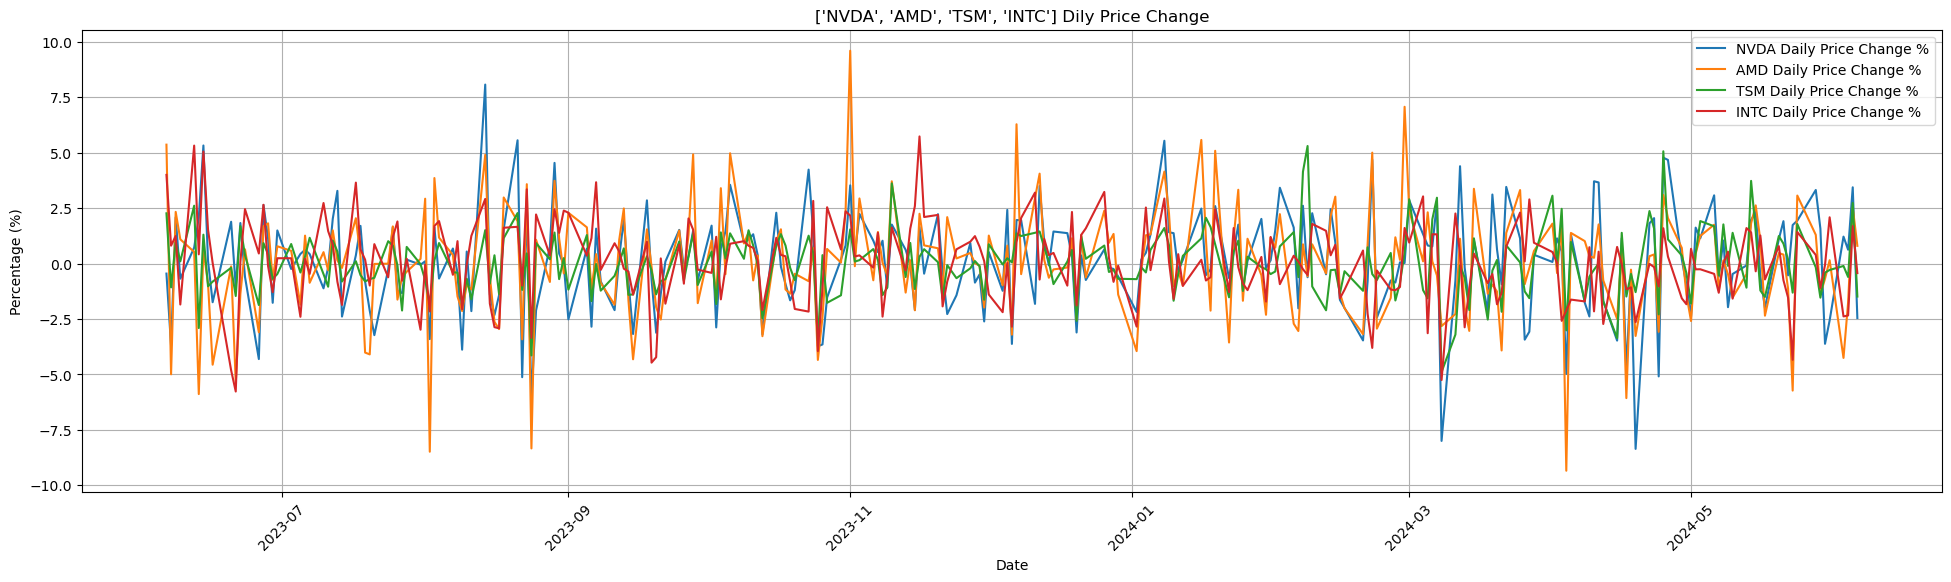

In [24]:
# Create a figure and axis for plotting
plt.figure(figsize=(24, 6))

for symbol in ticker_list:
    variable_name = symbol.replace('/', '_')  # Replace '/' with '_' to create a valid variable name

    plt.plot(locals()[f"stock_df_{variable_name}"]['date'], 
             locals()[f"stock_df_{variable_name}"]['daily change %'], 
             label=f'{variable_name} Daily Price Change %')
   
# Adding titles and labels
plt.title(f'{ticker_list} Dily Price Change')
plt.xlabel('Date')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()  # Show legend
plt.grid()  # Show grid

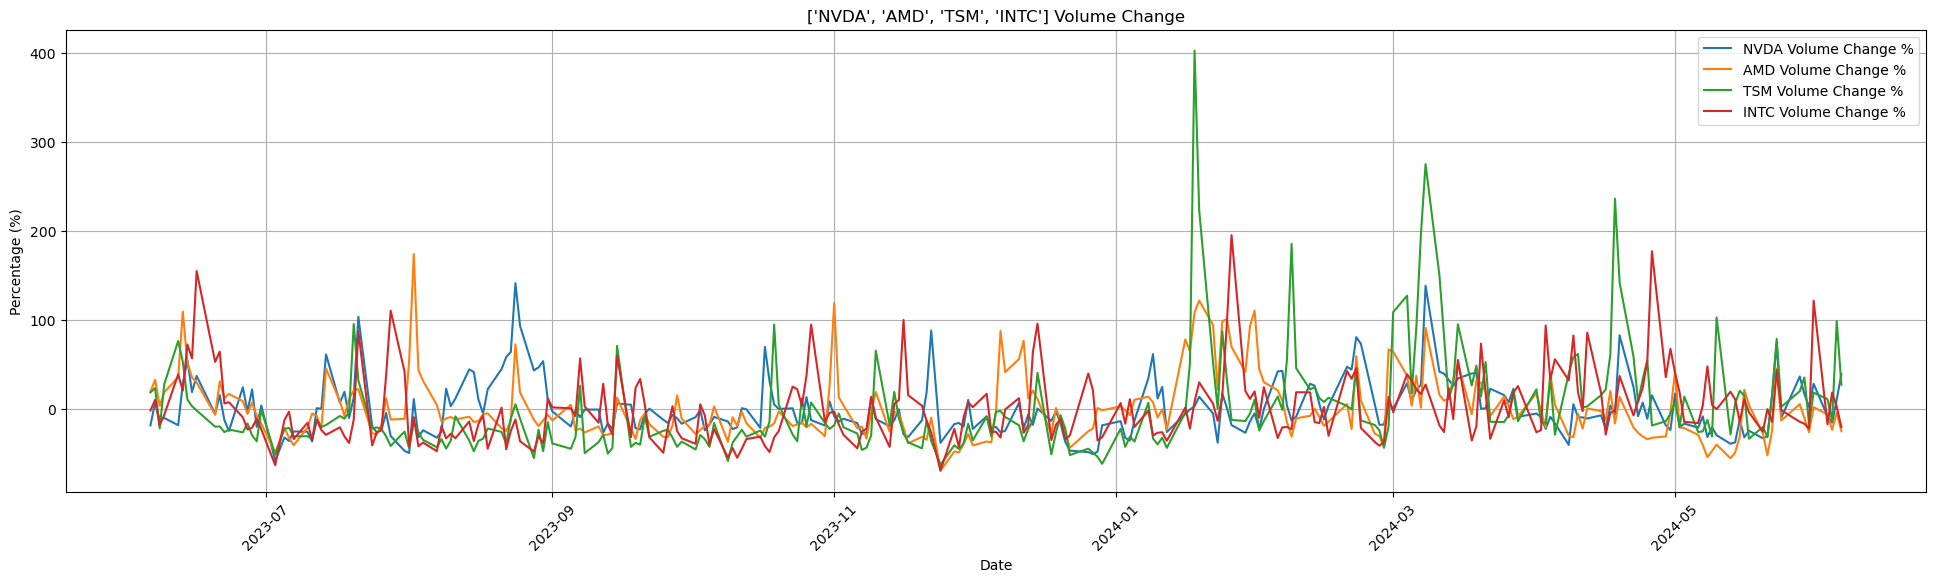

In [25]:
# Create a figure and axis for plotting
plt.figure(figsize=(24, 6))

for symbol in ticker_list:
    variable_name = symbol.replace('/', '_')  # Replace '/' with '_' to create a valid variable name

    plt.plot(locals()[f"stock_df_{variable_name}"]['date'], 
             locals()[f"stock_df_{variable_name}"]['vol_vs_average %'], 
             label=f'{variable_name} Volume Change %')
   
# Adding titles and labels
plt.title(f'{ticker_list} Volume Change')
plt.xlabel('Date')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()  # Show legend
plt.grid()  # Show grid

In [26]:
# user input for the ticker 
ticker_index_input = input("Enter the Stock symbols (e.g., SPY, QQQ, EWU, EWJ): ")
ticker_index_list = [f"{ticker.strip()}" for ticker in ticker_index_input.split(",")]  # Format as f-string
print(ticker_index_list) 

Enter the Stock symbols (e.g., SPY, QQQ, EWU, EWJ):  SPY, QQQ, EWU, EWJ


['SPY', 'QQQ', 'EWU', 'EWJ']


In [27]:
def fetch_data(ticker_index_list, start_date, end_date, timeframe='1D'):
    all_data = []  # To hold DataFrames for all symbols
    
    for symbol in ticker_index_list:
        # Fetching bar data from Alpaca
        barset = api.get_bars(symbol, timeframe, start=start_date, end=end_date)
        
        # Convert the barset to a DataFrame
        bars_df = pd.DataFrame([{
            'ticker': symbol,
            'time': bar.t.strftime('%Y-%m-%d %H:%M:%S'),  # Converting timestamp to string
            'open': bar.o,
            'high': bar.h,
            'low': bar.l,
            'close': bar.c,
            'volume': bar.v
        } for bar in barset])

        # Append this symbol's DataFrame to the list
        all_data.append(bars_df)

    # Concatenate all individual DataFrames into one
    combined_df = pd.concat(all_data, ignore_index=True)

    return combined_df

# List of tickers
print(ticker_index_list) 

# Fetching data and returning as a DataFrame
stock_index_df = fetch_data(ticker_index_list, start_date, end_date)

# Dynamically create DataFrames for each symbol
for symbol in ticker_index_list:
    variable_name = symbol.replace('/', '_')  # Replace '/' with '_' to create a valid variable name
    stock_index_df.loc[:,'date'] = pd.to_datetime(stock_index_df.loc[:,'time']).dt.date
    clean_stock_index_df = stock_index_df.copy()[['ticker', 'date', 'open', 'close', 'volume']]
    globals()[f"{variable_name}_df"] = clean_stock_index_df[clean_stock_index_df['ticker'] == symbol]
    print(f"\nDataFrame for {symbol}:\n", globals()[f"{variable_name}_df"])

['SPY', 'QQQ', 'EWU', 'EWJ']

DataFrame for SPY:
     ticker        date    open   close    volume
0      SPY  2023-06-06  426.67  428.03  64022176
1      SPY  2023-06-07  428.44  426.55  85372762
2      SPY  2023-06-08  426.62  429.13  61952842
3      SPY  2023-06-09  429.96  429.90  85647169
4      SPY  2023-06-12  430.92  433.80  76256703
..     ...         ...     ...     ...       ...
248    SPY  2024-05-31  523.59  527.37  90785855
249    SPY  2024-06-03  529.02  527.80  46835702
250    SPY  2024-06-04  526.46  528.39  34632661
251    SPY  2024-06-05  530.77  534.67  47610365
252    SPY  2024-06-06  534.98  534.66  30808530

[253 rows x 5 columns]

DataFrame for QQQ:
     ticker        date    open   close    volume
253    QQQ  2023-06-06  354.28  354.84  41409510
254    QQQ  2023-06-07  355.13  348.82  69240268
255    QQQ  2023-06-08  349.12  353.15  47162034
256    QQQ  2023-06-09  354.63  354.50  53190761
257    QQQ  2023-06-12  356.19  360.49  44860892
..     ...         ... 

In [28]:
for symbol in ticker_index_list:
    variable_name = symbol.replace('/', '_')  # Replace '/' with '_' to create a valid variable name
    stock_index_df_calc = globals()[f"{variable_name}_df"].copy()  # Make sure to use .copy() to avoid SettingWithCopyWarning
              
    # Run calculations
    stock_first_open = stock_index_df_calc.loc[:,'open'].iloc[0]
    stock_close = stock_index_df_calc.loc[:,'close']
    stock_open = stock_index_df_calc.loc[:,'open']
    price_change = ((stock_close - stock_first_open) / stock_first_open) * 100
    daily_change = ((stock_close - stock_open) / stock_open) * 100
    average_volume_stock = stock_index_df_calc['volume'].mean()
    volume = stock_index_df_calc.loc[:,'volume']
    volume_change = ((volume - average_volume_stock) / average_volume_stock) * 100

    # Use .loc[] to assign the new calculated columns
    stock_index_df_calc.loc[:,'price change %'] = price_change
    stock_index_df_calc.loc[:,'daily change %'] =  daily_change
    stock_index_df_calc.loc[:,'vol_vs_average %'] = volume_change
    
    # Store the DataFrame with the new name
    locals()[f"stock_index_df_{variable_name}"] = stock_index_df_calc
    
    # Print out the DataFrame
    print(f"\nDataFrame for {variable_name}:\n", locals()[f"stock_index_df_{variable_name}"])


DataFrame for SPY:
     ticker        date    open   close    volume  price change %  \
0      SPY  2023-06-06  426.67  428.03  64022176        0.318748   
1      SPY  2023-06-07  428.44  426.55  85372762       -0.028125   
2      SPY  2023-06-08  426.62  429.13  61952842        0.576558   
3      SPY  2023-06-09  429.96  429.90  85647169        0.757025   
4      SPY  2023-06-12  430.92  433.80  76256703        1.671081   
..     ...         ...     ...     ...       ...             ...   
248    SPY  2024-05-31  523.59  527.37  90785855       23.601378   
249    SPY  2024-06-03  529.02  527.80  46835702       23.702159   
250    SPY  2024-06-04  526.46  528.39  34632661       23.840439   
251    SPY  2024-06-05  530.77  534.67  47610365       25.312302   
252    SPY  2024-06-06  534.98  534.66  30808530       25.309959   

     daily change %  vol_vs_average %  
0          0.318748        -14.034668  
1         -0.441135         14.633683  
2          0.588346        -16.813252  
3 

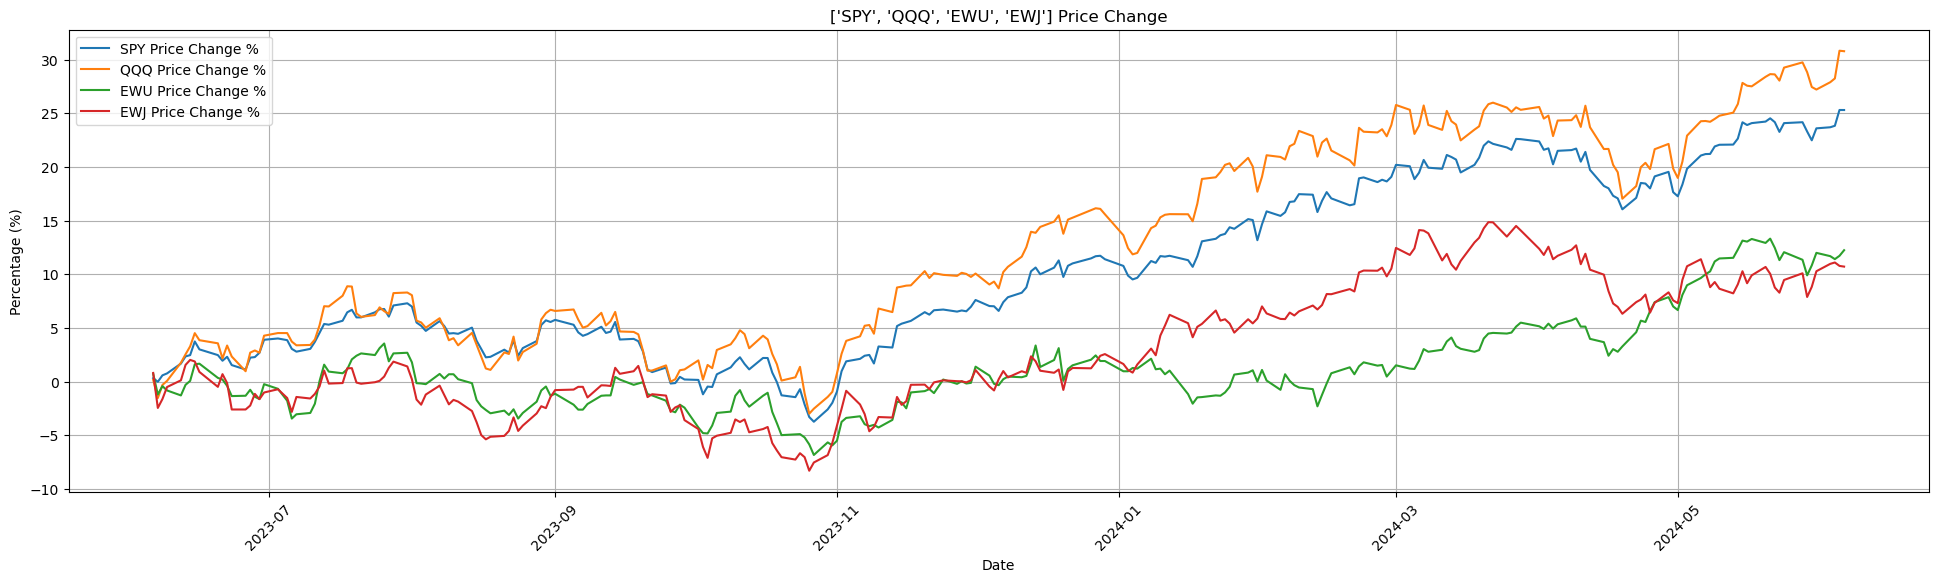

In [29]:
# Create a figure and axis for plotting
plt.figure(figsize=(24, 6))

for symbol in ticker_index_list:
    variable_name = symbol.replace('/', '_')  # Replace '/' with '_' to create a valid variable name

    plt.plot(locals()[f"stock_index_df_{variable_name}"]['date'], 
             locals()[f"stock_index_df_{variable_name}"]['price change %'], 
             label=f'{variable_name} Price Change %')
   
# Adding titles and labels
plt.title(f'{ticker_index_list} Price Change')
plt.xlabel('Date')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()  # Show legend
plt.grid()  # Show grid

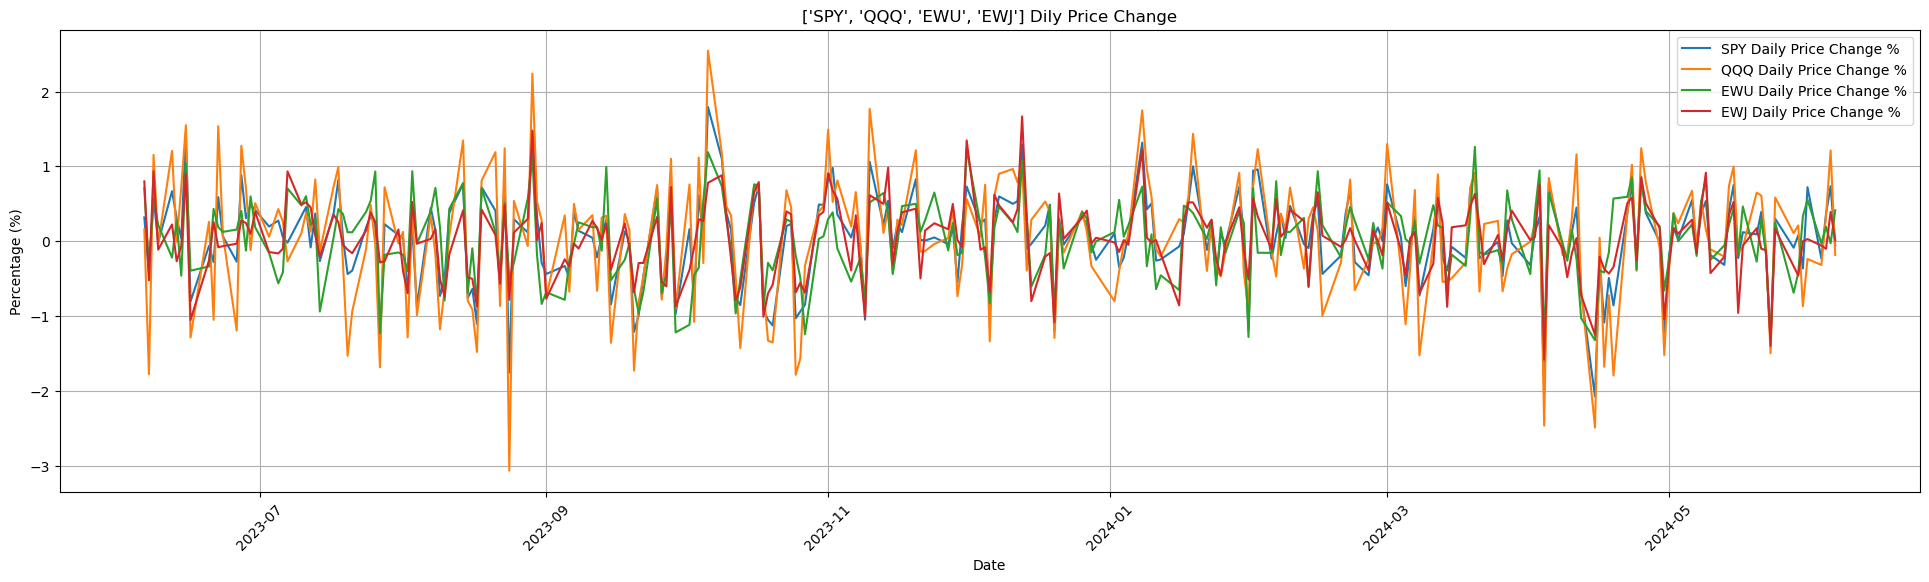

In [30]:
# Create a figure and axis for plotting
plt.figure(figsize=(24, 6))

for symbol in ticker_index_list:
    variable_name = symbol.replace('/', '_')  # Replace '/' with '_' to create a valid variable name

    plt.plot(locals()[f"stock_index_df_{variable_name}"]['date'], 
             locals()[f"stock_index_df_{variable_name}"]['daily change %'], 
             label=f'{variable_name} Daily Price Change %')
   
# Adding titles and labels
plt.title(f'{ticker_index_list} Dily Price Change')
plt.xlabel('Date')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()  # Show legend
plt.grid()  # Show grid

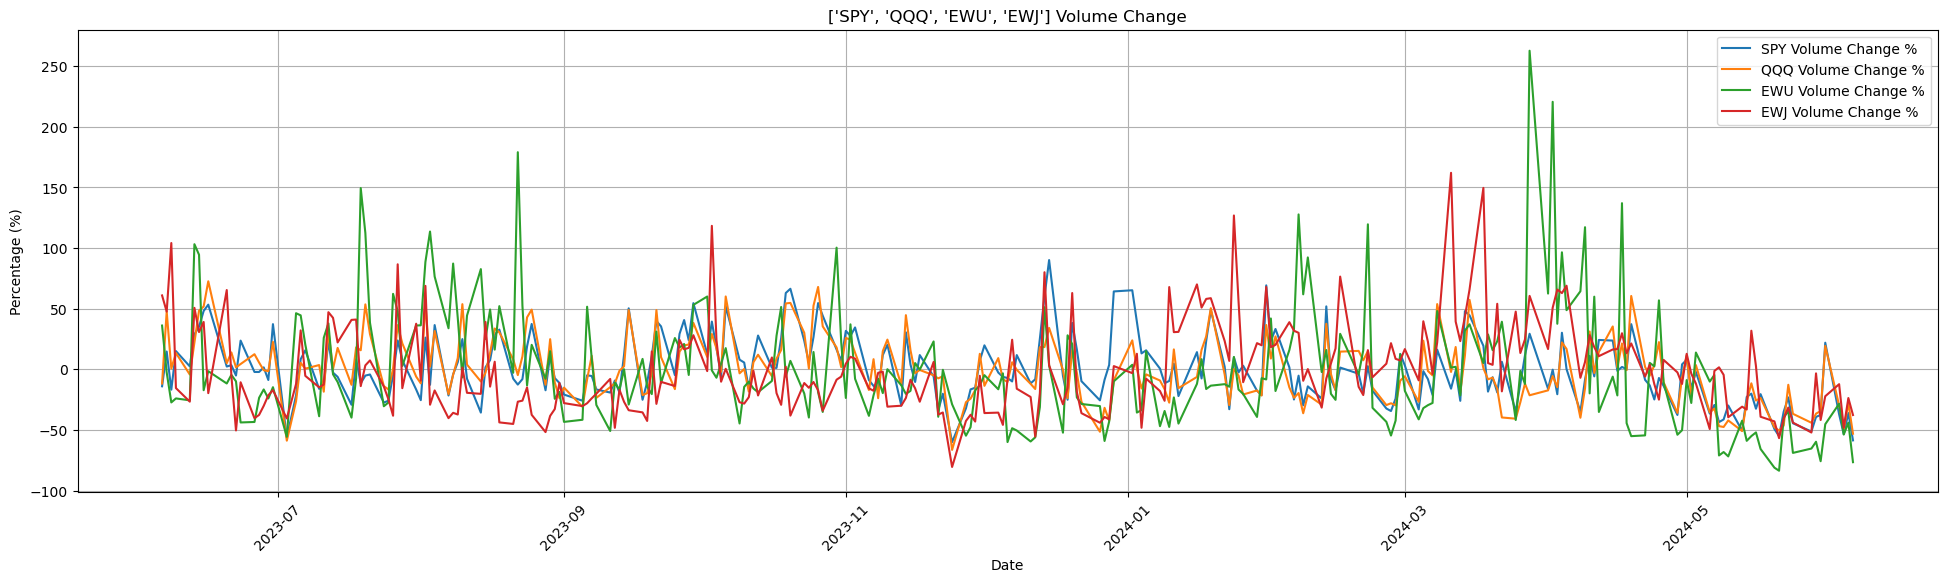

In [31]:
# Create a figure and axis for plotting
plt.figure(figsize=(24, 6))

for symbol in ticker_index_list:
    variable_name = symbol.replace('/', '_')  # Replace '/' with '_' to create a valid variable name

    plt.plot(locals()[f"stock_index_df_{variable_name}"]['date'], 
             locals()[f"stock_index_df_{variable_name}"]['vol_vs_average %'], 
             label=f'{variable_name} Volume Change %')
   
# Adding titles and labels
plt.title(f'{ticker_index_list} Volume Change')
plt.xlabel('Date')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()  # Show legend
plt.grid()  # Show grid